In [31]:
import pandas as pd
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Load the dataset
dataset_path = 'all_data.csv'  # Replace with your dataset path
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
data.head(10)


<ipython-input-13-b7f17131eceb>:3: DtypeWarning: Columns (84) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(dataset_path)


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,External IP
0,228571,7953,80,2751,49188,6,12231,4,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
1,228571,7953,80,2751,49188,6,12231,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
2,228571,7953,80,2751,49188,6,12231,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
3,228571,7953,80,2751,49188,6,12231,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
4,55580,7951,80,2743,49486,6,12232,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
5,55580,7951,80,2743,49486,6,12232,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
6,55580,7951,80,2743,49486,6,12232,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
7,55580,7951,80,2743,49486,6,12232,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
8,214598,2269,1031,2750,88,6,12235,609,7,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
9,214599,2269,1032,2750,88,6,12235,879,9,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0


In [ ]:
# prompt: print distinct elements  name in Label

print(data['Label'].unique())


['BENIGN' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'Infiltration' 'Bot' 'PortScan'
 'DDoS']


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Relevant features
relevant_features = [
     "Bwd Packet Length Std", "Flow Bytes/s", "Total Length of Fwd Packets",
    "Fwd Packet Length Std", "Flow IAT Std", "Flow IAT Min",
    "Fwd IAT Total", "Flow Duration", "Flow IAT Mean",
    "Flow IAT Max", "Total Length of Bwd Packets", "Bwd Packet Length Max",
    "Fwd Packet Length Mean", "Fwd Packet Length Min", "Flow Packets/s",
    "Bwd Packet Length Mean", "Total Backward Packets", "Fwd Packet Length Max",
    "Total Fwd Packets", "Bwd Packet Length Min","Label"
]

# Filter dataset by relevant features
data = data[relevant_features]

# Encode the target variable 'Attack_Type' (if it's categorical)
label_encoders = {}
categorical_columns = ['Label']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate numerical features for normalization
numerical_features = ["Bwd Packet Length Std", "Flow Bytes/s", "Total Length of Fwd Packets",
    "Fwd Packet Length Std", "Flow IAT Std", "Flow IAT Min",
    "Fwd IAT Total", "Flow Duration", "Flow IAT Mean",
    "Flow IAT Max", "Total Length of Bwd Packets", "Bwd Packet Length Max",
    "Fwd Packet Length Mean", "Fwd Packet Length Min", "Flow Packets/s",
    "Bwd Packet Length Mean", "Total Backward Packets", "Fwd Packet Length Max",
    "Total Fwd Packets", "Bwd Packet Length Min"]

# Normalize numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the preprocessed dataset
data.head(15)


,Bwd Packet Length Std,Flow Bytes/s,Total Length of Fwd Packets,Fwd Packet Length Std,Flow IAT Std,Flow IAT Min,Fwd IAT Total,Flow Duration,Flow IAT Mean,Flow IAT Max,...,Bwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Min,Flow Packets/s,Bwd Packet Length Mean,Total Backward Packets,Fwd Packet Length Max,Total Fwd Packets,Bwd Packet Length Min,Label
0,-0.404496,0.059620,-0.052849,-0.244326,-0.367915,-0.055089,-0.434333,-0.442378,-0.291806,-0.380079,...,-0.451533,-0.277785,-0.203236,1.673866,-0.508835,-0.010238,-0.279476,-0.009649,-0.587085,0
1,-0.404496,0.410755,-0.052849,-0.244326,-0.367915,-0.055090,-0.434333,-0.442378,-0.291807,-0.380079,...,-0.451533,-0.277785,-0.203236,7.536927,-0.508835,-0.010238,-0.279476,-0.009649,-0.587085,0
2,-0.404496,0.410755,-0.052849,-0.244326,-0.367915,-0.055090,-0.434333,-0.442378,-0.291807,-0.380079,...,-0.451533,-0.277785,-0.203236,7.536927,-0.508835,-0.010238,-0.279476,-0.009649,-0.587085,0
3,-0.404496,0.410755,-0.052849,-0.244326,-0.367915,-0.055090,-0.434333,-0.442378,-0.291807,-0.380079,...,-0.451533,-0.277785,-0.203236,7.536927,-0.508835,-0.010238,-0.279476,-0.009649,-0.587085,0
4,-0.404496,0.098635,-0.052849,-0.244326,-0.367915,-0.055089,-0.434333,-0.442378,-0.291806,-0.380079,...,-0.451533,-0.277785,-0.203236,2.325315,-0.508835,-0.010238,-0.279476,-0.009649,-0.587085,0
5,-0.404496,0.410755,-0.052849,-0.244326,-0.367915,-0.055090,-0.434333,-0.442378,-0.291807,-0.380079,...,-0.451533,-0.277785,-0.203236,7.536927,-0.508835,-0.010238,-0.279476,-0.009649,-0.587085,0
6,-0.404496,0.410755,-0.052849,-0.244326,-0.367915,-0.055090,-0.434333,-0.442378,-0.291807,-0.380079,...,-0.451533,-0.277785,-0.203236,7.536927,-0.508835,-0.010238,-0.279476,-0.009649,-0.587085,0
7,-0.404496,0.410755,-0.052849,-0.244326,-0.367915,-0.055090,-0.434333,-0.442378,-0.291807,-0.380079,...,-0.451533,-0.277785,-0.203236,7.536927,-0.508835,-0.010238,-0.279476,-0.009649,-0.587085,0
8,-0.265514,0.000105,-0.006573,0.145337,-0.367901,-0.055090,-0.434315,-0.442360,-0.291794,-0.380063,...,-0.347500,0.054164,-0.300659,-0.209888,-0.341415,-0.006259,0.031417,-0.003024,-0.587085,0
9,0.624106,0.107690,0.010291,0.229508,-0.367889,-0.055090,-0.434307,-0.442352,-0.291791,-0.380049,...,0.318411,0.073857,-0.300659,-0.222682,0.730236,-0.006259,0.140982,-0.000374,-0.587085,0


In [ ]:
le = LabelEncoder()
y = le.fit_transform(data['Label'])
X = data.drop('Label', axis=1)

# Save label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11}


In [ ]:
# Split data into features and target
features = ["Bwd Packet Length Std", "Flow Bytes/s", "Total Length of Fwd Packets",
    "Fwd Packet Length Std", "Flow IAT Std", "Flow IAT Min",
    "Fwd IAT Total", "Flow Duration", "Flow IAT Mean",
    "Flow IAT Max", "Total Length of Bwd Packets", "Bwd Packet Length Max",
    "Fwd Packet Length Mean", "Fwd Packet Length Min", "Flow Packets/s",
    "Bwd Packet Length Mean", "Total Backward Packets", "Fwd Packet Length Max",
    "Total Fwd Packets", "Bwd Packet Length Min"]  # List of features
X = data[features]  # Selecting only the relevant feature columns
y = data['Label']  # The target variable is 'Attack_Type'

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Show the first 10 rows of X_test
print(X_test.head(10))

# You can also display the first few rows of y_train if needed
# print(y_train.head())



         Bwd Packet Length Std  Flow Bytes/s  Total Length of Fwd Packets  \
2358105              -0.404496     -0.052548                    -0.054025   
2557894              -0.398330     -0.057419                     1.084550   
593494               -0.404496     -0.057095                    -0.048339   
1524711              -0.404496     -0.051345                    -0.053437   
2233773              -0.404496     -0.057326                    -0.049712   
161107                0.425894     -0.055266                    -0.011279   
2014581              -0.404496     -0.057425                    -0.054025   
429232               -0.404496     -0.057148                    -0.047162   
486313               -0.400468     -0.051715                    -0.054025   
431802               -0.404496     -0.050072                    -0.047555   

         Fwd Packet Length Std  Flow IAT Std  Flow IAT Min  Fwd IAT Total  \
2358105              -0.244326     -0.367915     -0.055074      -0.434333  

In [ ]:
# Train the model
anomaly_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
anomaly_model.fit(X_train, y_train)


# Save the trained model
model_path = 'anomaly_detection_model.pkl'
joblib.dump(anomaly_model, model_path)
print(f"Model saved to {model_path}")


Model saved to anomaly_detection_model.pkl


In [ ]:
# Make predictions on the test set
y_pred = anomaly_model.predict(X_test)


# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9718855218855219


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98    440645
           1       1.00      0.40      0.58       394
           2       0.96      0.26      0.41      8392
           3       0.94      0.96      0.95      2012
           4       0.88      0.97      0.92     46173
           5       0.94      0.98      0.96      1108
           6       0.99      0.99      0.99      1142
           7       1.00      0.98      0.99      1630
           8       0.00      0.00      0.00         1
           9       1.00      0.56      0.71         9
          10       0.99      1.00      1.00     31933
          11       1.00      0.50      0.67      1161

    accuracy                           0.97    534600
   macro avg       0.89      0.72      0.76    534600
weighted avg       0.97      0.97      0.97    534600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming you have already trained your model (e.g., id3_model) and have a label encoder (e.g., label_encoders['Attack_Type'])

# Step 1: Make predictions on the test set
y_pred = anomaly_model.predict(X_test)

# Step 2: Decode the predicted attack types and actual attack types
y_pred_decoded = label_encoders['Label'].inverse_transform(y_pred)
y_test_decoded = label_encoders['Label'].inverse_transform(y_test)

# Step 3: Create a DataFrame with 'Actual Attack Type' and 'Detected Attack Type'
results_data = pd.DataFrame({
    'Actual Attack Type': y_test_decoded,
    'Detected Attack Type': y_pred_decoded
})

# Step 4: Get distinct attack types (remove duplicates)
distinct_results_data = results_data.drop_duplicates()

# Step 5: Save to CSV
distinct_results_data.to_csv('distinct_attack_type_predictions.csv', index=False)

# Step 6: Optionally print accuracy for reference
print(f"Accuracy: {accuracy_score(y_test_decoded, y_pred_decoded)}")

print("CSV file 'distinct_attack_type_predictions.csv' has been saved.")


Accuracy: 0.9718855218855219
CSV file 'distinct_attack_type_predictions.csv' has been saved.


In [ ]:
unique_attacks = list(set(y_pred_decoded))

# Print the unique attack names
print("Unique predicted attack names:")
for attack in unique_attacks:
  print(attack)

Unique predicted attack names:
DoS GoldenEye
Bot
BENIGN
FTP-Patator
DoS Hulk
Infiltration
DoS Slowhttptest
DoS slowloris
PortScan
DDoS
SSH-Patator


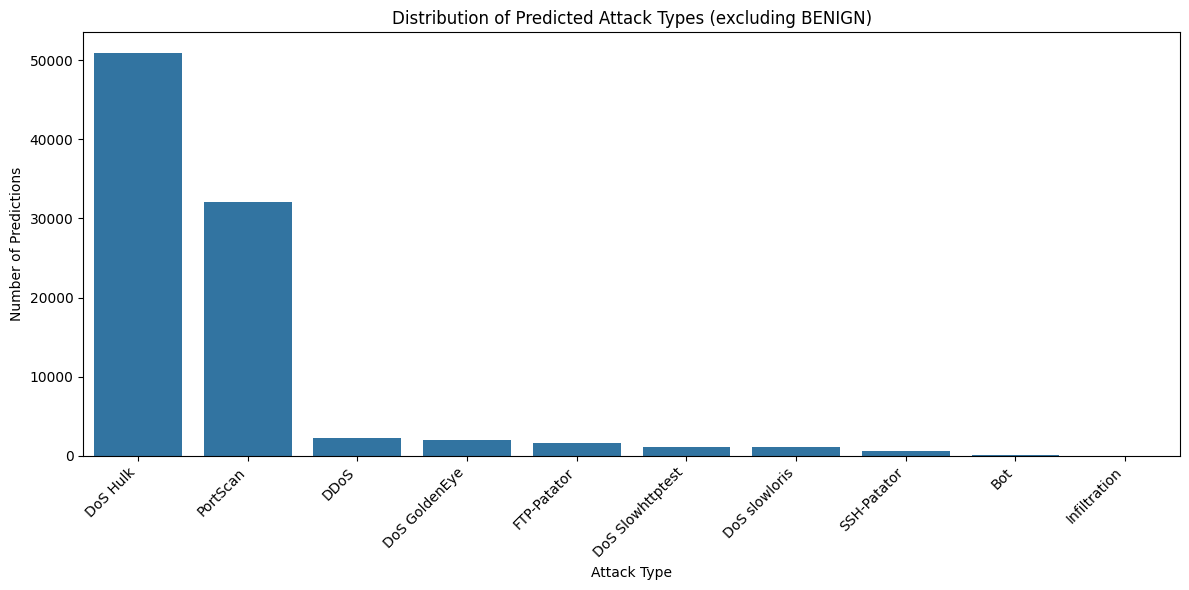

In [ ]:
# prompt: create a graph of 'y_pred_decoded' without benign

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y_pred_decoded' and 'y_test_decoded' are defined as in the previous code
# ... (your existing code)

# Filter out 'BENIGN' from y_pred_decoded
y_pred_non_benign = [attack for attack in y_pred_decoded if attack != 'BENIGN']

# Count the occurrences of each attack type
attack_counts = pd.Series(y_pred_non_benign).value_counts()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_counts.index, y=attack_counts.values)
plt.xlabel("Attack Type")
plt.ylabel("Number of Predictions")
plt.title("Distribution of Predicted Attack Types (excluding BENIGN)")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# prompt: create a  new x_test at random_state=12 and save to csv file

# Assuming X and y are defined as in your previous code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=50)

# Save the new X_test to a CSV file
X_test.to_csv('x_test_random_state_12.csv', index=False)


In [55]:
# prompt: test the model with new dataset new_X = new_df[X_train.columns]
# # Make predictions
# new_y_pred = model.predict(new_X)
# # Inverse transform the predictions to get original attack type labels
# new_y_pred_labels = le.inverse_transform(new_y_pred)
# # Print the predictions
# print("Predictions on new dataset:")
# new_y_pred_labels

import pandas as pd
le = LabelEncoder()
# Load the saved model
model_path = '/content/anomaly_detection_model.pkl'
model = joblib.load(model_path)

# Load the new dataset
new_df = pd.read_csv('/content/filtered_dataset.csv')

# Ensure new_X has the same columns as X_train
#new_X = new_df[X_train.columns]

# Make predictions
new_y_pred = model.predict(new_df)
#Load the saved label encoder
label_encoders = joblib.load('label_encoders.pkl') # Load the fitted encoder
le = label_encoders['Label']

# Inverse transform the predictions to get original attack type labels
new_y_pred_labels = le.inverse_transform(new_y_pred)

# Print the predictions
print("Predictions on new dataset:")
new_y_pred_labels


Predictions on new dataset:


array(['Heartbleed', 'Heartbleed', 'BENIGN', ..., 'Heartbleed',
       'Heartbleed', 'Heartbleed'], dtype=object)

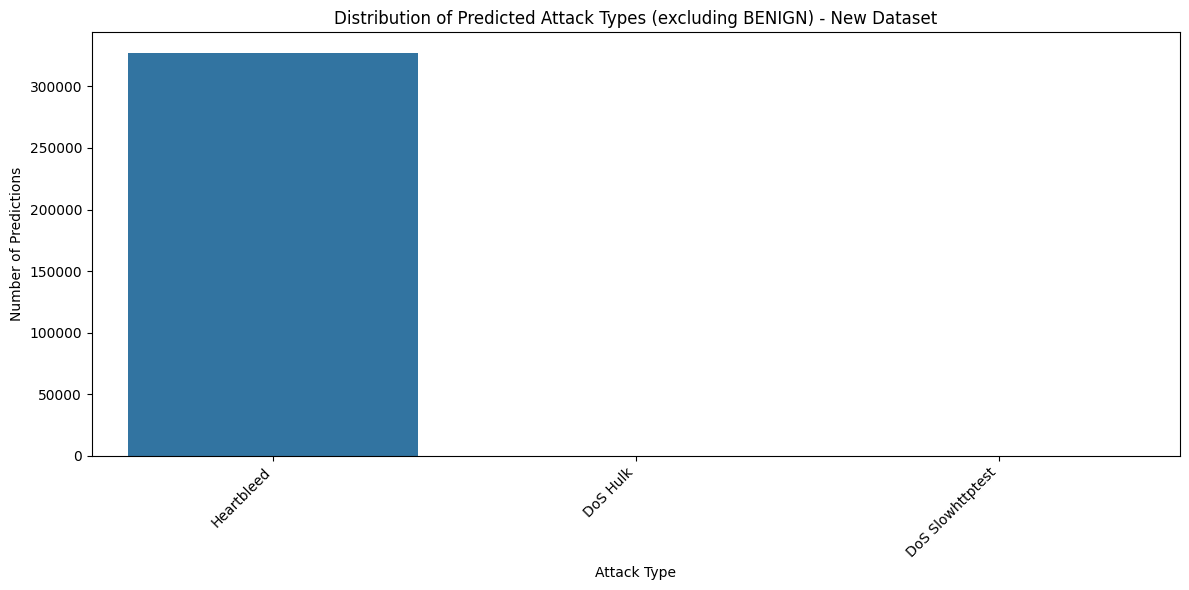

In [56]:
# prompt: create a graph of 'new_y_pred_labels' without benign

import pandas as pd
import matplotlib.pyplot as plt
# Filter out 'BENIGN' from new_y_pred_labels
new_y_pred_non_benign = [attack for attack in new_y_pred_labels if attack != 'BENIGN']

# Count the occurrences of each attack type
attack_counts = pd.Series(new_y_pred_non_benign).value_counts()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_counts.index, y=attack_counts.values)
plt.xlabel("Attack Type")
plt.ylabel("Number of Predictions")
plt.title("Distribution of Predicted Attack Types (excluding BENIGN) - New Dataset")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


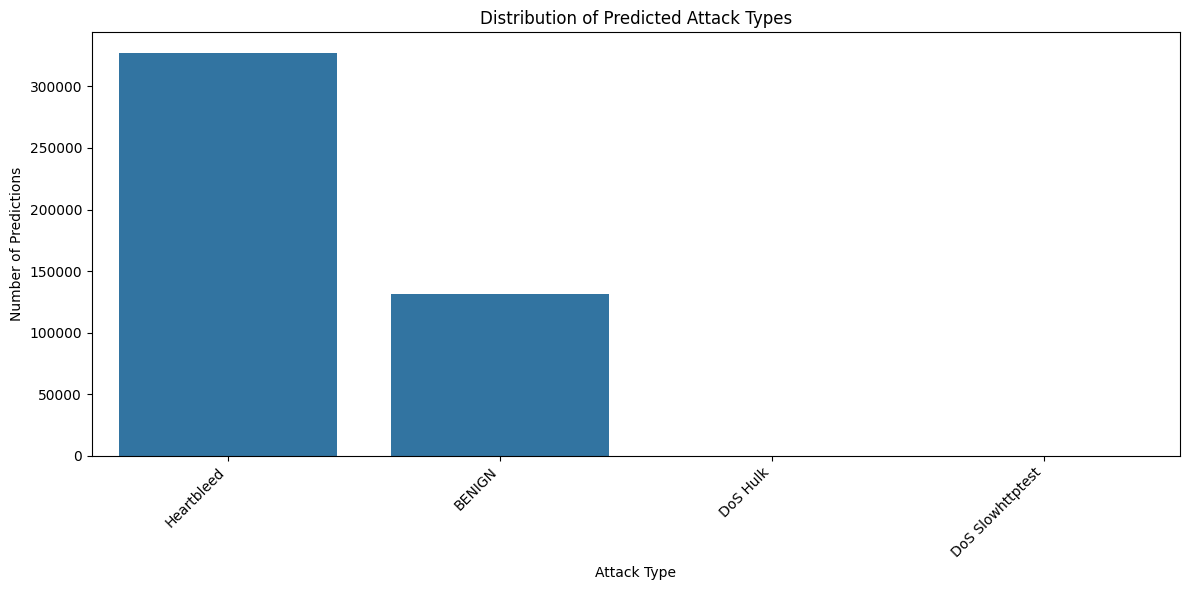

In [57]:
# prompt: create a graph of 'y_pred_decoded' including benign

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_pred_decoded is already defined from previous code
attack_counts = pd.Series(new_y_pred_labels).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=attack_counts.index, y=attack_counts.values)
plt.xlabel("Attack Type")
plt.ylabel("Number of Predictions")
plt.title("Distribution of Predicted Attack Types")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [58]:
# prompt: print count of each class iny_pred_decoded'
#  and alsp print total count

import pandas as pd
# Assuming y_pred_decoded is already defined from previous code
attack_counts = pd.Series(new_y_pred_labels).value_counts()

for attack, count in attack_counts.items():
    print(f"{attack}: {count}")

print(f"Total count: {attack_counts.sum()}")


Heartbleed: 327464
BENIGN: 131416
DoS Hulk: 87
DoS Slowhttptest: 1
Total count: 458968


In [54]:
# prompt: creategraphical representation of y pred decoded and when hovering cursor it should show the count

import plotly.graph_objects as go

# Assuming 'y_pred_decoded' is defined as in your previous code
attack_counts = pd.Series(new_y_pred_labels).value_counts()

fig = go.Figure(data=[go.Bar(
    x=attack_counts.index,
    y=attack_counts.values,
    text=attack_counts.values,  # Text to display on hover
    hovertemplate='Attack Type: %{x}<br>Count: %{text}<extra></extra>' # Custom hover text
)])

fig.update_layout(
    title="Distribution of Predicted Attack Types",
    xaxis_title="Attack Type",
    yaxis_title="Count",
    xaxis={'categoryorder':'total descending'},
    height=600,  # Adjust height as needed
    width=1000   # Adjust width as needed
)


fig.show()


In [ ]:
label_encoder_path = 'label_encoders.pkl'
joblib.dump(label_encoders, label_encoder_path)
print(f"Label encoder saved to {label_encoder_path}")

Label encoder saved to label_encoders.pkl
